In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error


In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
#read the data
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv')


In [4]:
#drop unnecessary columns
df = df[['MONATSZAHL', 'AUSPRAEGUNG' , 'JAHR', 'MONAT', 'WERT']]
#drop not defined values in Wert
df = df.dropna()

In [5]:
df['WERT'] = pd.to_numeric(df['WERT'], errors='coerce')
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
12,Alkoholunfälle,insgesamt,2021,Summe,383.0
13,Alkoholunfälle,insgesamt,2021,202101,16.0
14,Alkoholunfälle,insgesamt,2021,202102,14.0
15,Alkoholunfälle,insgesamt,2021,202103,24.0
16,Alkoholunfälle,insgesamt,2021,202104,16.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [6]:
#Remove Summe values
df_filtered = df[df['MONAT'] != 'Summe']
#Sort values based on increasing months, historically
df_filtered = df_filtered.sort_values(by='MONAT')

In [7]:
#See the different categories in Monatszahl and Auspraegung
print(df_filtered['MONATSZAHL'].unique())
print(df_filtered['AUSPRAEGUNG'].unique())


['Verkehrsunfälle' 'Alkoholunfälle' 'Fluchtunfälle']
['Verletzte und Getötete' 'mit Personenschäden' 'insgesamt']


In [8]:
#Filter the "ingesamt" Auspraegung
df_filtered = df_filtered[df_filtered['AUSPRAEGUNG'] == 'insgesamt']
df_filtered

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
882,Fluchtunfälle,insgesamt,2000,200001,835.0
286,Alkoholunfälle,insgesamt,2000,200001,78.0
1478,Verkehrsunfälle,insgesamt,2000,200001,3448.0
883,Fluchtunfälle,insgesamt,2000,200002,890.0
1479,Verkehrsunfälle,insgesamt,2000,200002,3181.0
...,...,...,...,...,...
1215,Verkehrsunfälle,insgesamt,2021,202111,3308.0
23,Alkoholunfälle,insgesamt,2021,202111,33.0
620,Fluchtunfälle,insgesamt,2021,202112,788.0
24,Alkoholunfälle,insgesamt,2021,202112,21.0


In [9]:
#Have 3 sub categories in the date as Alkoholunfälle, Fluchtunfälle and Verkehrsunfälle
df_Alkoholunfalle = df_filtered[df_filtered['MONATSZAHL'] == 'Alkoholunfälle']
df_Fluchtunfalle = df_filtered[df_filtered['MONATSZAHL'] == 'Fluchtunfälle']
df_Verkehrsunfalle = df_filtered[df_filtered['MONATSZAHL'] == 'Verkehrsunfälle']
df_Alkoholunfalle.shape





(264, 5)

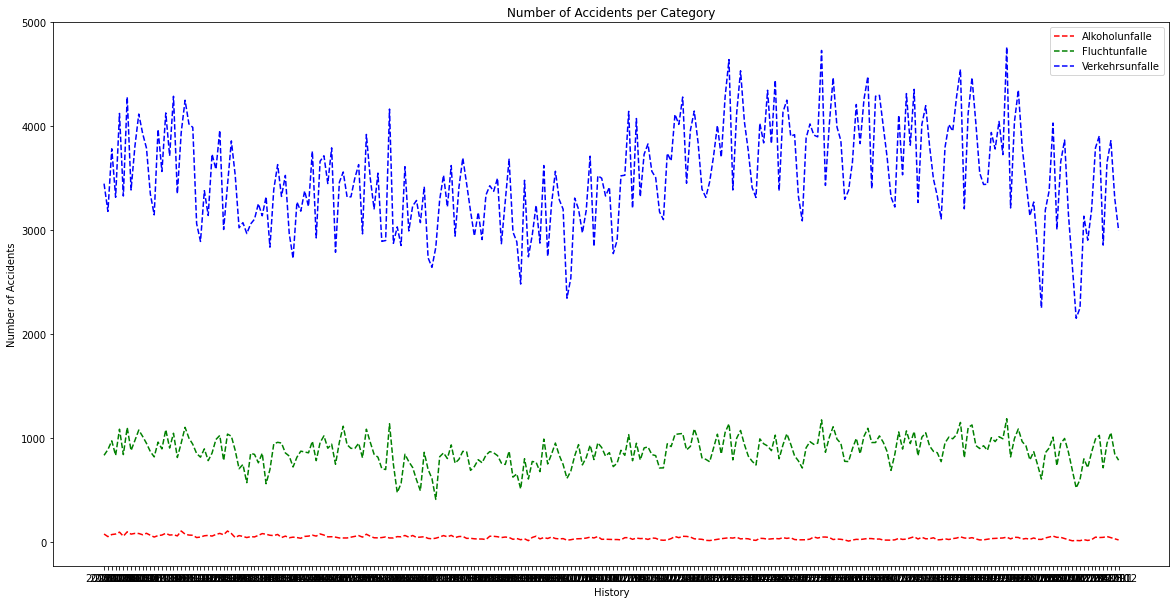

In [10]:
#Plot each sub category
plt.plot(df_Alkoholunfalle['MONAT'], df_Alkoholunfalle['WERT'],'r--', label =  "Alkoholunfalle") 
plt.plot(df_Fluchtunfalle['MONAT'],df_Fluchtunfalle['WERT'],'g--', label = "Fluchtunfalle")
plt.plot(df_Verkehrsunfalle['MONAT'], df_Verkehrsunfalle['WERT'], 'b--', label = "Verkehrsunfalle")
plt.ylabel('Number of Accidents')
plt.xlabel('History')
plt.title('Number of Accidents per Category')
plt.legend()
plt.show()

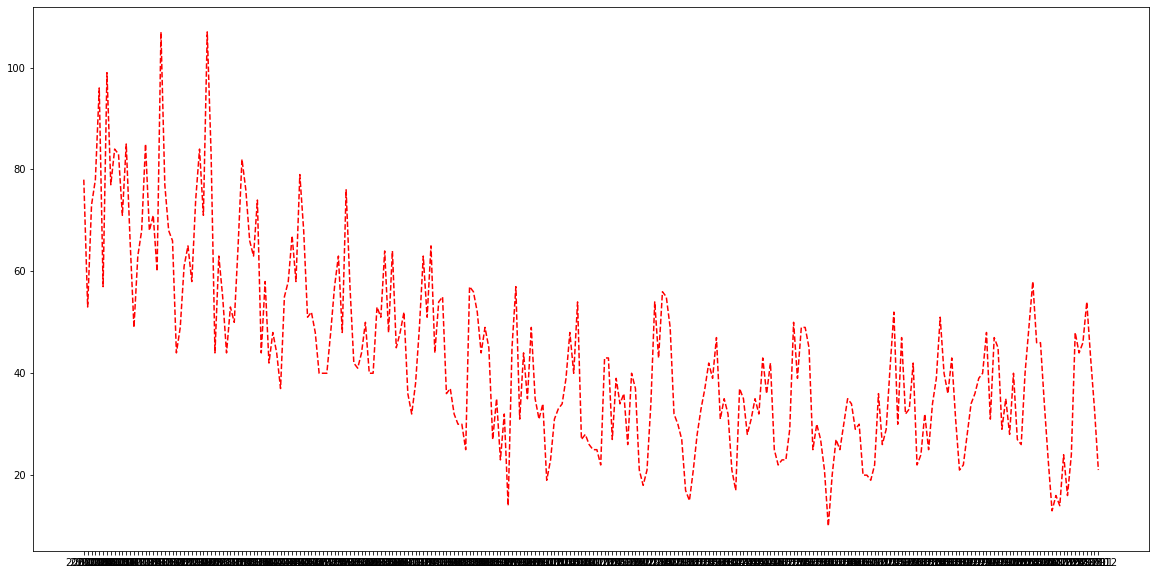

In [11]:
#filter Monat and Wert in Alkoholunfalle and plot Alkoholunfalle
df = df_Alkoholunfalle[['MONAT', 'WERT']]
plt.plot(df_Alkoholunfalle['MONAT'], df_Alkoholunfalle['WERT'],'r--', label =  "Alkoholunfalle") 



In [12]:
#set index as MONAT
df.reset_index(drop=True)
dataset = df.iloc[:,1].values
dataset = dataset.reshape(-1,1)
df = df.set_index('MONAT')


In [13]:
dataset

array([[ 78.],
       [ 53.],
       [ 73.],
       [ 78.],
       [ 96.],
       [ 57.],
       [ 99.],
       [ 77.],
       [ 84.],
       [ 83.],
       [ 71.],
       [ 85.],
       [ 66.],
       [ 49.],
       [ 63.],
       [ 68.],
       [ 85.],
       [ 68.],
       [ 71.],
       [ 60.],
       [107.],
       [ 77.],
       [ 68.],
       [ 66.],
       [ 44.],
       [ 49.],
       [ 61.],
       [ 65.],
       [ 58.],
       [ 74.],
       [ 84.],
       [ 71.],
       [107.],
       [ 83.],
       [ 44.],
       [ 63.],
       [ 55.],
       [ 44.],
       [ 53.],
       [ 50.],
       [ 65.],
       [ 82.],
       [ 76.],
       [ 66.],
       [ 63.],
       [ 74.],
       [ 44.],
       [ 58.],
       [ 42.],
       [ 48.],
       [ 44.],
       [ 37.],
       [ 55.],
       [ 58.],
       [ 67.],
       [ 58.],
       [ 79.],
       [ 68.],
       [ 51.],
       [ 52.],
       [ 48.],
       [ 40.],
       [ 40.],
       [ 40.],
       [ 48.],
       [ 57.],
       [ 6

In [14]:
#divide the data set into train-test(test set is 2021 values)
train = df.iloc[:252]
test= df.iloc[252:]
test= test[0:12]
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 202101 to 202112
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WERT    12 non-null     float64
dtypes: float64(1)
memory usage: 192.0+ bytes


In [15]:
#min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test) 

In [16]:
#train generator
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM
n_input = 1
#n_input = 12
n_feature = 1

#train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input, batch_size=1)
train_generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input, batch_size=4)

In [17]:
# Creating LSTM Model 
model = Sequential()
model.add(LSTM(50, input_shape=(n_input, 1))) # 50 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adamax')


In [18]:
#train the model
model.fit(train_generator,epochs= 100, batch_size=4)

Epoch 1/100
63/63 [==============================] - 6s 6ms/step - loss: 0.0995
Epoch 2/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0538
Epoch 3/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0327
Epoch 4/100
63/63 [==============================] - 1s 7ms/step - loss: 0.0254
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0237
Epoch 6/100
63/63 [==============================] - 0s 5ms/step - loss: 0.0230
Epoch 7/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0225
Epoch 8/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0221
Epoch 9/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0218
Epoch 10/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0212
Epoch 11/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0208
Epoch 12/100
63/63 [==============================] - 0s 4ms/step - loss: 0.0203
Epoch 13/100
63/63 [=================

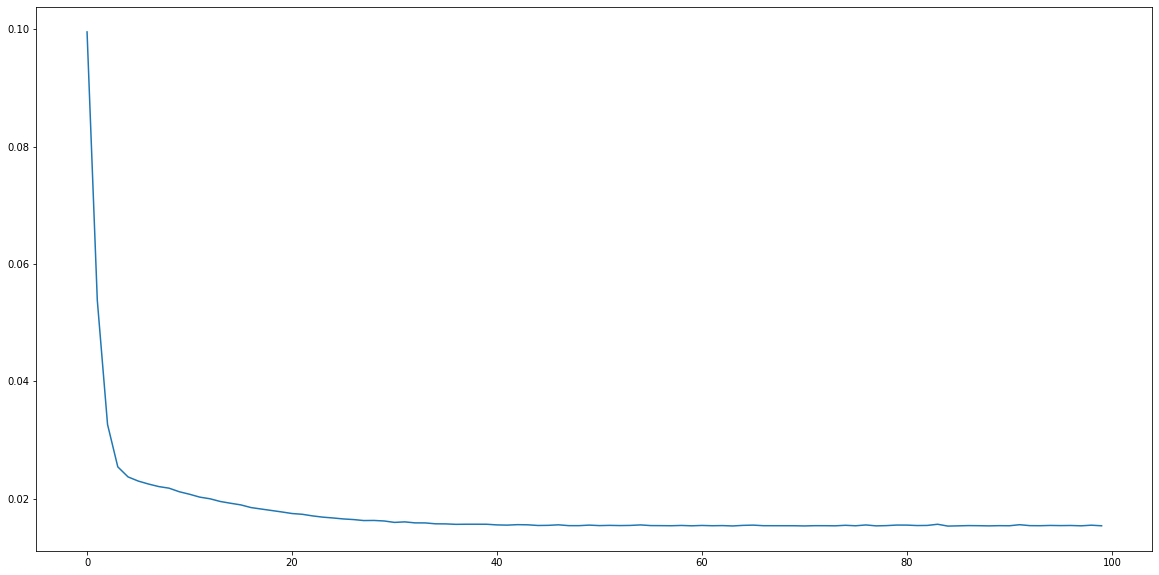

In [19]:
#visualize the loss
my_loss= model.history.history['loss']
plt.plot(range(len(my_loss)),my_loss)

In [20]:
TrainPredict = model.predict(scaled_train)

8/8 [==============================] - 1s 3ms/step


In [21]:
TrainPredict

array([[0.6071795 ],
       [0.41225392],
       [0.56770945],
       [0.6071795 ],
       [0.75091493],
       [0.44300717],
       [0.7750873 ],
       [0.599268  ],
       [0.65482193],
       [0.6468615 ],
       [0.55198413],
       [0.66279   ],
       [0.5128363 ],
       [0.38168508],
       [0.48946598],
       [0.5284664 ],
       [0.66279   ],
       [0.5284664 ],
       [0.55198413],
       [0.46618846],
       [0.8397976 ],
       [0.599268  ],
       [0.5284664 ],
       [0.5128363 ],
       [0.3437451 ],
       [0.38168508],
       [0.47393712],
       [0.50503606],
       [0.45072338],
       [0.57558566],
       [0.65482193],
       [0.55198413],
       [0.8397976 ],
       [0.6468615 ],
       [0.3437451 ],
       [0.48946598],
       [0.42760795],
       [0.3437451 ],
       [0.41225392],
       [0.38930959],
       [0.50503606],
       [0.63890886],
       [0.59136516],
       [0.5128363 ],
       [0.48946598],
       [0.57558566],
       [0.3437451 ],
       [0.450

In [22]:
trainPredict = scaler.inverse_transform(TrainPredict)

In [23]:
trainPredict

array([[68.896416],
       [49.988632],
       [65.06782 ],
       [68.896416],
       [82.838745],
       [52.971695],
       [85.18347 ],
       [68.129   ],
       [73.51773 ],
       [72.74557 ],
       [63.54246 ],
       [74.290634],
       [59.74512 ],
       [47.023453],
       [57.4782  ],
       [61.261242],
       [74.290634],
       [61.261242],
       [63.54246 ],
       [55.22028 ],
       [91.46037 ],
       [68.129   ],
       [61.261242],
       [59.74512 ],
       [43.343277],
       [47.023453],
       [55.971897],
       [58.9885  ],
       [53.720165],
       [65.83181 ],
       [73.51773 ],
       [63.54246 ],
       [91.46037 ],
       [72.74557 ],
       [43.343277],
       [57.4782  ],
       [51.477974],
       [43.343277],
       [49.988632],
       [47.76303 ],
       [58.9885  ],
       [71.97416 ],
       [67.36242 ],
       [59.74512 ],
       [57.4782  ],
       [65.83181 ],
       [43.343277],
       [53.720165],
       [41.879677],
       [46.285046],


In [24]:
TestPredict = model.predict(scaled_test)
testPredict = scaler.inverse_transform(TestPredict)

1/1 [==============================] - 0s 25ms/step


In [25]:
testPredict

array([[23.338284],
       [21.952381],
       [28.942083],
       [23.338284],
       [28.942083],
       [46.285046],
       [43.343277],
       [44.811756],
       [50.732746],
       [42.61086 ],
       [35.356407],
       [26.829556]], dtype=float32)

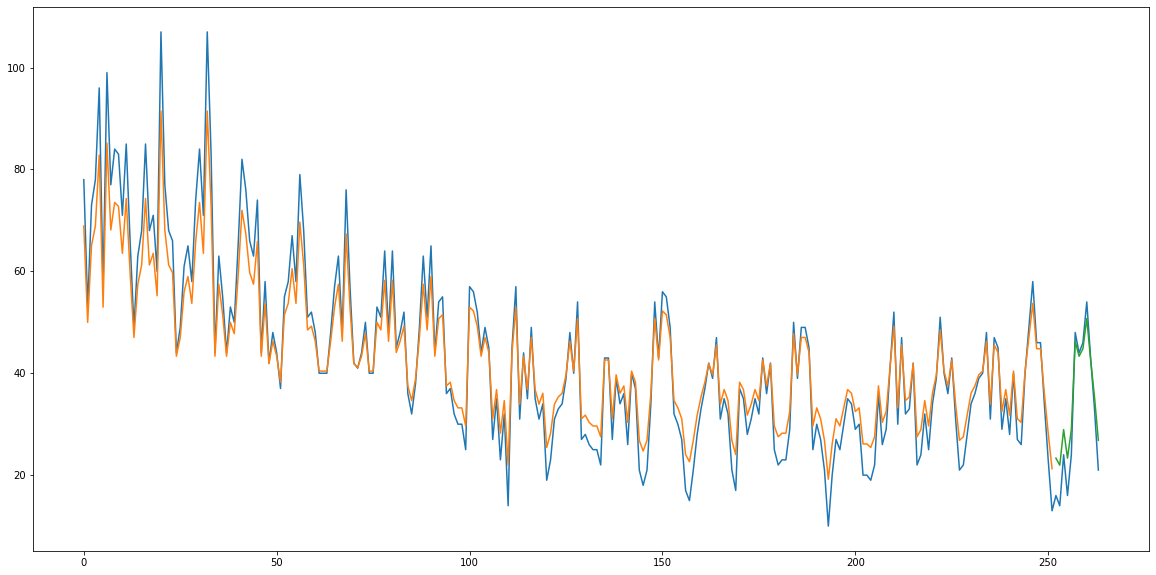

(252, 1)

In [29]:
#Shifting train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
#trainPredictPlot[0:len(trainPredict), :] = trainPredict
trainPredictPlot[0:len(trainPredict), :] = trainPredict
#Shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict):len(dataset), :] = testPredict
#testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
#Plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
trainPredict.shape

In [31]:
test['Predictions'] =testPredict

In [32]:
test

,WERT,Predictions
MONAT,,
202101,16.0,23.338284
202102,14.0,21.952381
202103,24.0,28.942083
202104,16.0,23.338284
202105,24.0,28.942083
202106,48.0,46.285046
202107,44.0,43.343277
202108,46.0,44.811756
202109,54.0,50.732746


In [33]:
train['Predictions'] =trainPredict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
train

,WERT,Predictions
MONAT,,
200001,78.0,68.896416
200002,53.0,49.988632
200003,73.0,65.067818
200004,78.0,68.896416
200005,96.0,82.838745
...,...,...
202008,46.0,44.811756
202009,46.0,44.811756
202010,34.0,36.075981


In [36]:
import joblib


In [38]:
#export model
joblib.dump(model, 'model.joblib')

['model.joblib']